# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:*Rohit Rathi*
**Email:*rr4791@nyu.edu*

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

Observed 6 sixes out of 10 rolls
P(A | 6 sixes) = 0.000
P(B | 6 sixes) = 0.128
P(C | 6 sixes) = 0.872
True die: C


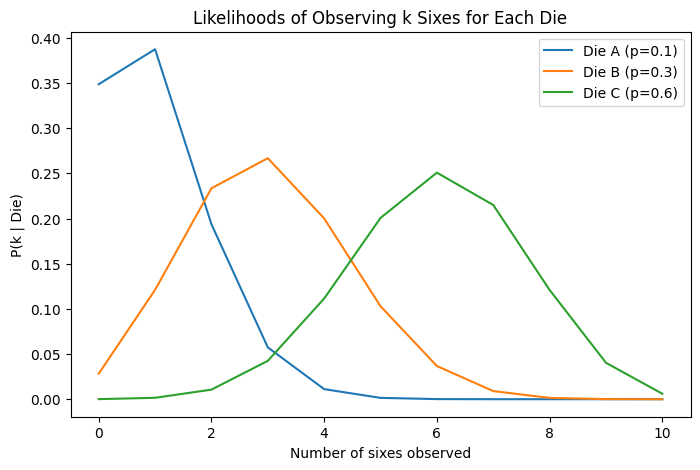

Accuracy over 100 rounds: 0.75


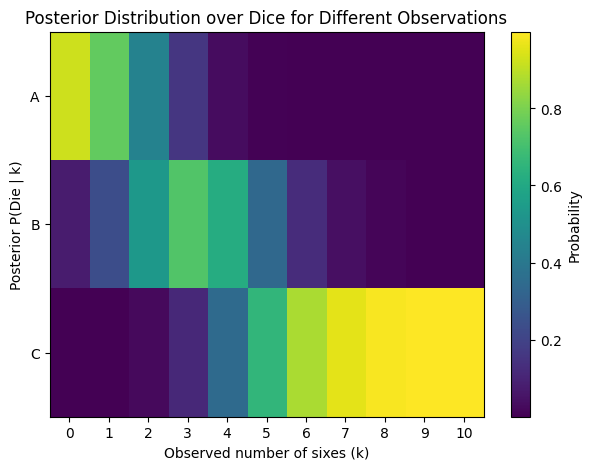

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = np.ones(len(dice_names)) / len(dice_names)
n_rolls = 10

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    """P(K = k | n, p) for a Binomial(n, p)."""
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

def simulate_round():
    """
    1. Choose a die at random using the prior.
    2. Roll it n_rolls times.
    3. Return (true_die_name, number_of_sixes).
    """
    die_idx = np.random.choice(len(dice_names), p=prior)
    die_name = dice_names[die_idx]
    p = dice_probs[die_name]
    k = np.random.binomial(n_rolls, p)
    return die_name, k

def posterior_given_k(k):
    """
    Compute posterior P(die | k) for all dice.
    Returns a numpy array aligned with dice_names.
    """
    # likelihood for each die
    likelihoods = []
    for die in dice_names:
        p = dice_probs[die]
        likelihoods.append(binomial_prob(n_rolls, k, p))
    likelihoods = np.array(likelihoods)
      # Bayes' rule
    numerators = likelihoods * prior
    posterior = numerators / numerators.sum()
    return posterior

# Example run
true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")

# Likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.show()

# Accuracy evaluation
num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")

# Posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Posterior P(Die | k)')
plt.colorbar(label='Probability')
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()

## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [2]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

X = np.c_[np.ones(len(x)), x]
theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
y_pred = X @ theta
mse_linear = np.mean((y - y_pred)**2) 
print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [5. 0.] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

First 5 steps for α = 1/400:
 [[12.6        32.768     ]
 [12.3952     18.94592766]
 [12.25940637 12.5786358 ]
 [12.15952887  9.03849801]
 [12.08157912  6.84231694]] 

First 5 steps for α = 1/4,000,000:
 [[12.99996    79.99360019]
 [12.99992    79.98720115]
 [12.99988001 79.98080288]
 [12.99984001 79.97440538]
 [12.99980002 79.96800864]]


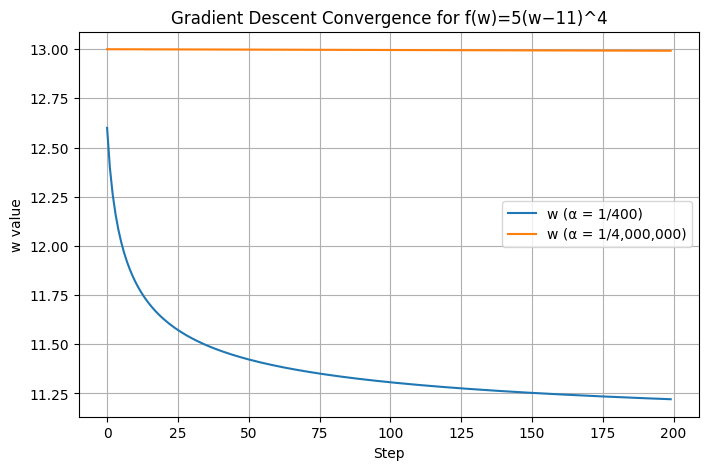

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    history = []
    w = w0
    for i in range(steps):
        grad = 20 * (w - 11)**3      # derivative of f(w) = 5(w-11)^4
        w = w - alpha * grad         # update rule
        f_val = 5 * (w - 11)**4      # compute f(w)
        history.append([w, f_val])
    return np.array(history)

# Run for two learning rates
hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

print("First 5 steps for α = 1/400:\n", hist_140[:5], "\n")
print("First 5 steps for α = 1/4,000,000:\n", hist_180[:5])

# Visualization
plt.figure(figsize=(8,5))
plt.plot(hist_140[:,0], label='w (α = 1/400)')
plt.plot(hist_180[:,0], label='w (α = 1/4,000,000)')
plt.xlabel('Step')
plt.ylabel('w value')
plt.title('Gradient Descent Convergence for f(w)=5(w−11)^4')
plt.legend()
plt.grid(True)
plt.show()

ALL THE BEST!